In [1]:
#Make a shot map and a pass map using Statsbomb data
#Set match id in match_id_required.

#Function to draw the pitch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mplsoccer import Pitch
from mplsoccer.quiver import arrows

In [2]:
#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

In [3]:
#ID for World Cup
match_id_required = 3869685

In [4]:
# Load in the data
# I took this from https://znstrider.github.io/2018-11-11-Getting-Started-with-StatsBomb-Data/
file_name=str(match_id_required)+'.json'

#Load in all match events 
import json
with open('Statsbomb/data/events/'+file_name,encoding="utf8") as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)

In [5]:
# json file take full page so comment for now
# data

In [6]:
#get the nested structure into a dataframe 
#store the dataframe in a dictionary with the match id as key (remove '.json' from string)

df = pd.json_normalize(data, sep = "_").assign(match_id = file_name[:-5])

In [7]:
df.head(3)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,shot_one_on_one,pass_outswinging,shot_aerial_won,foul_committed_advantage,foul_won_advantage,block_offensive,foul_committed_offensive,bad_behaviour_card_id,bad_behaviour_card_name,match_id
0,0584ee21-e3dd-4d9f-95a0-5b5e84be25c3,1,1,00:00:00.000,0,0,1,0.0,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3869685
1,b32679f8-942e-4122-96a2-015caf75e628,2,1,00:00:00.000,0,0,1,0.0,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3869685
2,954f6855-de22-46a2-8d09-6fe94eec2b9b,3,1,00:00:00.000,0,0,1,0.0,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3869685


In [8]:
#A dataframe of shots
#shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

In [9]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type_id', 'type_name',
       ...
       'shot_one_on_one', 'pass_outswinging', 'shot_aerial_won',
       'foul_committed_advantage', 'foul_won_advantage', 'block_offensive',
       'foul_committed_offensive', 'bad_behaviour_card_id',
       'bad_behaviour_card_name', 'match_id'],
      dtype='object', length=122)

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
df.columns.tolist()

['id',
 'index',
 'period',
 'timestamp',
 'minute',
 'second',
 'possession',
 'duration',
 'type_id',
 'type_name',
 'possession_team_id',
 'possession_team_name',
 'play_pattern_id',
 'play_pattern_name',
 'team_id',
 'team_name',
 'tactics_formation',
 'tactics_lineup',
 'related_events',
 'location',
 'player_id',
 'player_name',
 'position_id',
 'position_name',
 'pass_recipient_id',
 'pass_recipient_name',
 'pass_length',
 'pass_angle',
 'pass_height_id',
 'pass_height_name',
 'pass_end_location',
 'pass_type_id',
 'pass_type_name',
 'pass_body_part_id',
 'pass_body_part_name',
 'carry_end_location',
 'pass_switch',
 'pass_outcome_id',
 'pass_outcome_name',
 'ball_receipt_outcome_id',
 'ball_receipt_outcome_name',
 'under_pressure',
 'off_camera',
 'counterpress',
 'block_deflection',
 'pass_deflected',
 'foul_won_defensive',
 'out',
 'pass_cross',
 'clearance_head',
 'clearance_body_part_id',
 'clearance_body_part_name',
 'pass_through_ball',
 'pass_technique_id',
 'pass_techni

In [12]:
df.player_id.unique()

array([   nan,  5487., 10481.,  3604., 29201.,  3026.,  7797., 20572.,
        3090.,  5477.,  5507., 27886.,  6909.,  6704.,  5485.,  4445.,
        5503.,  2995., 29560.,  3099.,  8519., 38718.,  3009., 22097.,
        2972., 19597.,  8217., 24778., 28263., 11990., 11456., 16308.,
       11135.,  5743.,  7161.])

In [13]:
df.player_name.unique()

array([nan, 'Antoine Griezmann', 'Aurélien Djani Tchouaméni',
       'Olivier Giroud', 'Nahuel Molina Lucero', 'Adrien Rabiot',
       'Rodrigo Javier De Paul', 'Cristian Gabriel Romero',
       'Nicolás Hernán Otamendi', 'Ousmane Dembélé',
       'Nicolás Alejandro Tagliafico', 'Alexis Mac Allister',
       'Damián Emiliano Martínez', 'Theo Bernard François Hernández',
       'Raphaël Varane', 'Jules Koundé', 'Lionel Andrés Messi Cuccittini',
       'Ángel Fabián Di María Hernández', 'Julián Álvarez', 'Hugo Lloris',
       'Dayotchanculle Upamecano', 'Enzo Fernandez',
       'Kylian Mbappé Lottin', 'Randal Kolo Muani', 'Marcus Thuram',
       'Marcos Javier Acuña', 'Kingsley Coman', 'Eduardo Camavinga',
       'Gonzalo Ariel Montiel', 'Youssouf Fofana',
       'Lautaro Javier Martínez', 'Leandro Daniel Paredes',
       'Ibrahima Konaté', 'Paulo Bruno Exequiel Dybala',
       'Germán Alejandro Pezzella'], dtype=object)

In [14]:
# df.player_name

In [15]:
# Kylian Mbappé Lottin

In [16]:
df.player_name[210]

'Kylian Mbappé Lottin'

In [17]:
df.player_id[210]

np.float64(3009.0)

# Mbappe pass data

In [18]:
MBAPPE = 3009
df_Mbappe_pass = df[(df['player_id'] == MBAPPE) & (df['type_name'] == 'Pass')].reset_index(drop=True)

In [19]:
df_Mbappe_pass.location.head(1)

0    [38.8, 46.8]
Name: location, dtype: object

In [20]:
df_Mbappe_pass[['x_start','y_start']] = pd.DataFrame(df_Mbappe_pass.location.tolist(), index=df_Mbappe_pass.index)
df_Mbappe_pass[['x_end','y_end']] = pd.DataFrame(df_Mbappe_pass.pass_end_location.tolist(), index=df_Mbappe_pass.index)

In [21]:
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')

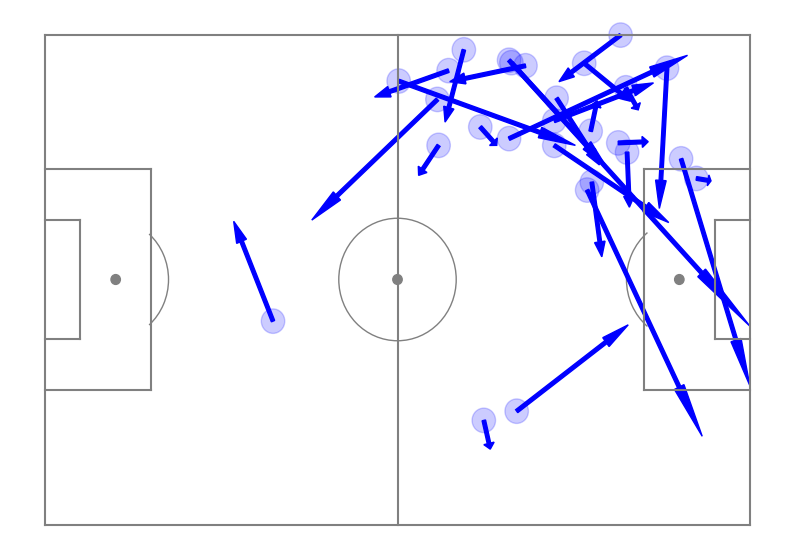

In [22]:
#Draw the pitch
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
#Plot the shots
for i,thepass in passes.iterrows():
    #if thepass['team_name']==away_team_required: #
    if thepass['player_name']=='Kylian Mbappé Lottin':
        x=thepass['location'][0]
        y=thepass['location'][1]
        passCircle=plt.Circle((x,pitchWidthY-y),2,color="blue")      
        passCircle.set_alpha(.2)   
        ax.add_patch(passCircle)
        dx=thepass['pass_end_location'][0]-x
        dy=thepass['pass_end_location'][1]-y

        passArrow=plt.Arrow(x,pitchWidthY-y,dx,-dy,width=3,color="blue")
        ax.add_patch(passArrow)

fig.set_size_inches(10, 7)

In [23]:
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

In [24]:
shot=shots.iloc[0]

In [25]:
shot.head(19)

index                                                      192
period                                                       1
timestamp                                         00:04:40.798
minute                                                       4
second                                                      40
possession                                                  14
duration                                               0.94819
type_id                                                     16
type_name                                                 Shot
possession_team_id                                         779
possession_team_name                                 Argentina
play_pattern_id                                              1
play_pattern_name                                 Regular Play
team_id                                                    779
team_name                                            Argentina
tactics_formation                                      

In [26]:
shot['location']

[92.4, 30.0]

In [27]:
home_team_required ="Argentina"
away_team_required ="France"

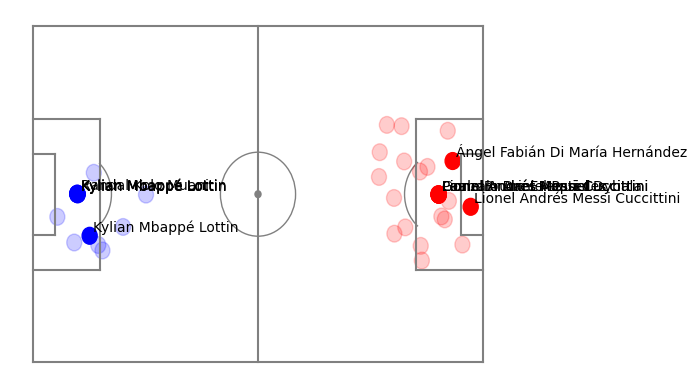

In [28]:
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
#Plot the shots
for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    
    goal=shot['shot_outcome_name']=='Goal'
    team_name=shot['team_name']
    
    circleSize=2
    #circleSize=np.sqrt(shot['shot_statsbomb_xg'])*12

    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)